In [ ]:
import torch
import torchvision
from torchvision import transforms , datasets

In [ ]:
train = datasets.MNIST("",train=True,download=True,transform=transforms.Compose([transforms.ToTensor()]))
test = datasets.MNIST("",train=False,download=True,transform=transforms.Compose([transforms.ToTensor()]))

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 16040785.63it/s]


Extracting MNIST/raw/train-images-idx3-ubyte.gz to MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 514536.11it/s]


Extracting MNIST/raw/train-labels-idx1-ubyte.gz to MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 4434747.65it/s]


Extracting MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 8062009.64it/s]

Extracting MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST/raw



In [ ]:
train


Dataset MNIST
    Number of datapoints: 60000
    Root location: 
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
           )

In [ ]:
test

Dataset MNIST
    Number of datapoints: 10000
    Root location: 
    Split: Test
    StandardTransform
Transform: Compose(
               ToTensor()
           )

In [ ]:
trainset = torch.utils.data.DataLoader(train,batch_size=10,shuffle=True)
testset = torch.utils.data.DataLoader(test,batch_size=10,shuffle=True)

In [ ]:
#10 data in tensor in batch_size
for data in trainset:
    print(data)
    break

[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0

In [ ]:
print(data[0][0].shape)

torch.Size([1, 28, 28])


In [ ]:
x , y = data[0][0], data[1][0]
print(y)

tensor(2)


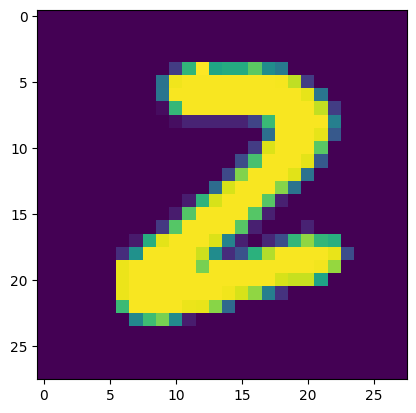

In [ ]:
import matplotlib.pyplot as plt
#plt.imshow(data[0][0]) Error
plt.imshow(data[0][0].view(28,28))

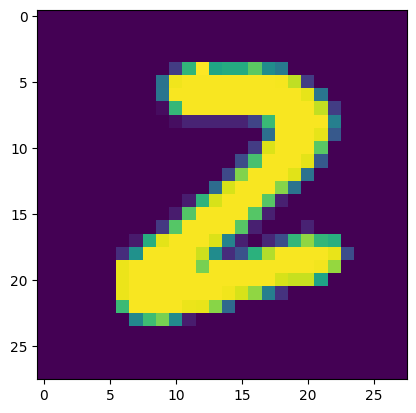

In [ ]:
plt.imshow(x.view(28,28))

In [ ]:
total = 0
counter_dict = {0:0,1:0,2:0,3:0,4:0,5:0,6:0,7:0,8:0,9:0}
for data in trainset:
    Xs,ys = data
    for y in ys:
        counter_dict[int(y)] += 1
        total += 1
print(counter_dict)

{0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}


In [ ]:
for i in counter_dict:
    print(f"{i} : {counter_dict[i]/total*100}")

0 : 9.871666666666666
1 : 11.236666666666666
2 : 9.93
3 : 10.218333333333334
4 : 9.736666666666666
5 : 9.035
6 : 9.863333333333333
7 : 10.441666666666666
8 : 9.751666666666667
9 : 9.915000000000001


In [ ]:
import torch.nn as nn
import torch.nn.functional as F

In [ ]:
class model(nn.Module):

  def __init__(self):
    super().__init__()
    self.fc1 = nn.Linear(28*28,64)
    self.fc2 = nn.Linear(64,64)
    self.fc3 = nn.Linear(64,64)
    self.fc4 = nn.Linear(64,10)

  def forward(self,x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = F.relu(self.fc3(x))
    x = self.fc4(x)
    return F.log_softmax(x,dim=1)

model = model()
print(model)

model(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


In [ ]:
from torch.optim import Adam
optimizer = Adam(model.parameters(),lr=0.001)
epochs = 3
for epoch in range(epochs):
  for data in trainset:
    X,y = data
    model.zero_grad()
    output = model(X.view(-1,28*28))
    loss = F.nll_loss(output,y)
    loss.backward()
    optimizer.step()
    print(f'epochs : {epoch} ,  loss : {loss.item()}')

  print(loss)

Streaming output truncated to the last 5000 lines.
epochs : 2 ,  loss : 0.0005876288050785661
epochs : 2 ,  loss : 0.0039049177430570126
epochs : 2 ,  loss : 0.0001233585353475064
epochs : 2 ,  loss : 0.0015152134001255035
epochs : 2 ,  loss : 0.00041383784264326096
epochs : 2 ,  loss : 0.0018080354202538729
epochs : 2 ,  loss : 0.001144111854955554
epochs : 2 ,  loss : 0.006064261309802532
epochs : 2 ,  loss : 0.0004010052070952952
epochs : 2 ,  loss : 0.0007899091579020023
epochs : 2 ,  loss : 0.38041621446609497
epochs : 2 ,  loss : 0.20427961647510529
epochs : 2 ,  loss : 0.002017996273934841
epochs : 2 ,  loss : 0.03548846393823624
epochs : 2 ,  loss : 0.008862840943038464
epochs : 2 ,  loss : 0.0027009728364646435
epochs : 2 ,  loss : 0.021552328020334244
epochs : 2 ,  loss : 0.01354815810918808
epochs : 2 ,  loss : 0.11744560301303864
epochs : 2 ,  loss : 0.11405079066753387
epochs : 2 ,  loss : 0.003794157411903143
epochs : 2 ,  loss : 0.0015301647363230586
epochs : 2 ,  loss :

In [ ]:
correct= 0
total = 0
with torch.no_grad():
  for data in trainset:
    X,y = data
    output = model(X.view(-1,784))
    for idx,i in enumerate(output):
      if torch.argmax(i) == y[idx]:
        correct += 1
      total += 1
print("Accuracy : ",round(correct/total,3))

Accuracy :  0.987


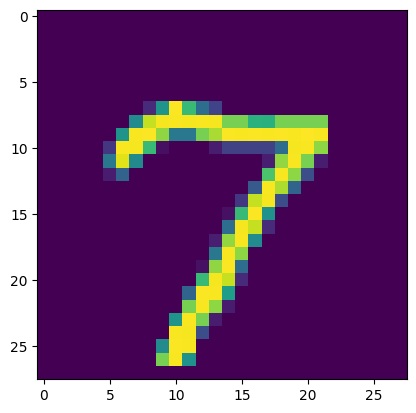

tensor(7)


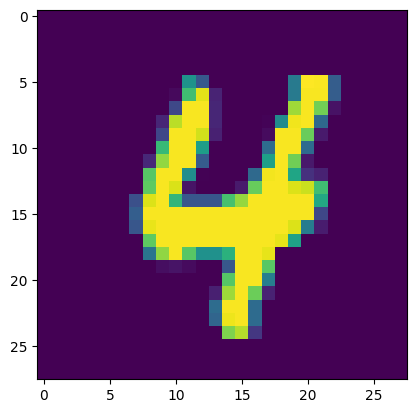

tensor(4)


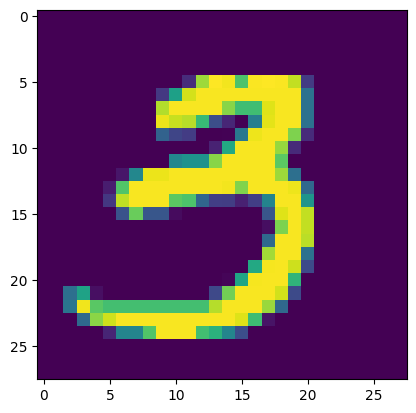

tensor(3)


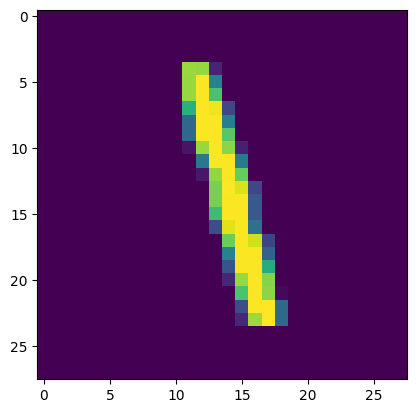

tensor(1)


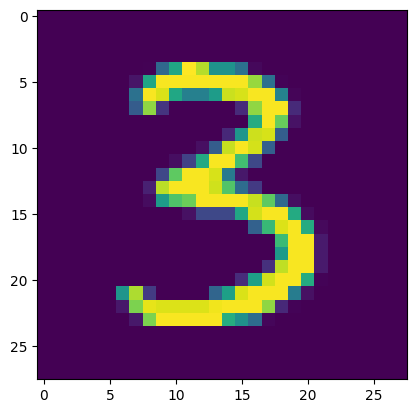

tensor(3)


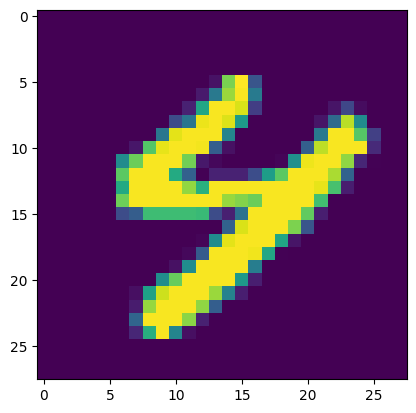

tensor(4)


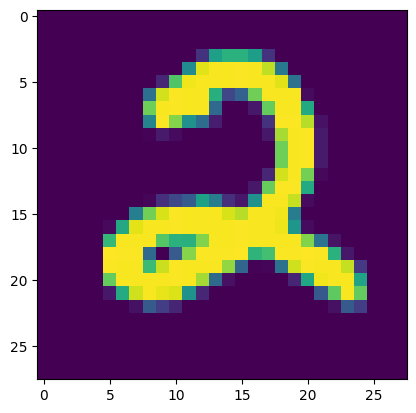

tensor(2)


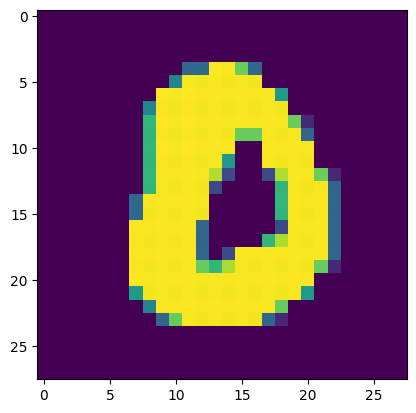

tensor(0)


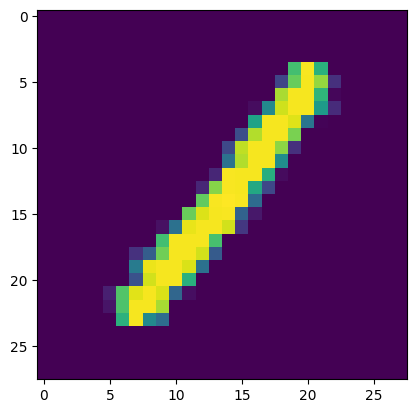

tensor(1)


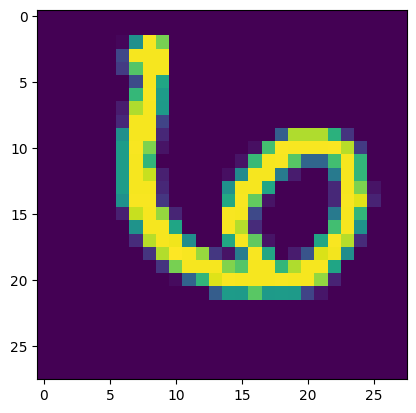

tensor(6)


In [ ]:
import matplotlib.pyplot as plt # make sure to import matplotlib
import torch

for i in range(10):
  plt.imshow(X[i].view(28,28)) # X is the correct variable name
  plt.show()

  print(torch.argmax(model(X[i].view(-1 , 784))[0])) # X is the correct variable name
  plt.show()